# Run LIANA & MOFA

## Setup Env

In [1]:
import os, fnmatch

import numpy as np
import pandas as pd

import scanpy as sc
import squidpy as sq
import mudata as mu

In [2]:
import liana as li

In [3]:
import decoupler as dc
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_dir = os.path.join('..', '..', 'data', 'kidney_injury', 'visium')

In [5]:
times = ['fsham', 'f4hr', 'f12hr', 'f2dps', 'f6wks']

## Load Processed Objects

### Load Visium

In [6]:
slides = fnmatch.filter(os.listdir(os.path.join(data_dir, 'mdatas')), '*.h5ad')

In [7]:
mdatas = dict()
for slide in slides:
    sample = slide[:-5].split('_')[0]
    print(sample)
    mdatas[sample] = mu.read_h5mu(os.path.join(data_dir, 'mdatas', sample + '.h5ad'))
    

f12hr


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


f2dps


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


f4hr


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


f6wks


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


fsham


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


## LR basis

Here we run LIANA's lr_basis on each sample

In [8]:
for sample in mdatas.keys():
    adata = mdatas[sample].mod['rna']
    # sc.pp.scale(adata)
    
    li.ut.spatial_neighbors(adata, bandwidth=150, cutoff=0.05)
    
    li.mt.lr_bivar(adata,
                   function_name="cosine",
                   expr_prop=0.1,
                   resource_name="MouseConsensus",
                   use_raw=False, 
                   n_perms=100,
                   mask_negatives=False, 
                   add_categories=True,
                   verbose=True
                   )
    # extract the local scores
    mdatas[sample].mod['lrs']  = adata.obsm['local_scores']
    
    
    # calculate Morans for Global morans
    morans_global, _ = li.mt.lr_bivar(sc.pp.scale(adata, copy=True),
                                      function_name="morans",
                                      expr_prop=0.1,
                                      resource_name="MouseConsensus", 
                                      use_raw=False, 
                                      n_perms=None,
                                      mask_negatives=False,
                                      connectivity_key="spatial_connectivities",
                                      add_categories=True,
                                      verbose=True,
                                      inplace=False
                                      )
    mdatas[sample].mod['rna'].uns['morans_res'] = morans_global
    


Using resource `MouseConsensus`.
Using `.X`!


100%|██████████| 100/100 [00:11<00:00,  8.49it/s]


Using resource `MouseConsensus`.
Using `.X`!
Converting mat to CSR format
1 features of mat are empty, they will be removed.
Using resource `MouseConsensus`.
Using `.X`!


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


Using resource `MouseConsensus`.
Using `.X`!
Converting mat to CSR format
1 features of mat are empty, they will be removed.
Using resource `MouseConsensus`.
Using `.X`!
7 features of mat are empty, they will be removed.


100%|██████████| 100/100 [00:09<00:00, 11.01it/s]


Using resource `MouseConsensus`.
Using `.X`!
Converting mat to CSR format
10 features of mat are empty, they will be removed.
Using resource `MouseConsensus`.
Using `.X`!


100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


Using resource `MouseConsensus`.
Using `.X`!
Converting mat to CSR format
6 features of mat are empty, they will be removed.
Using resource `MouseConsensus`.
Using `.X`!
3 features of mat are empty, they will be removed.


100%|██████████| 100/100 [00:14<00:00,  6.88it/s]


Using resource `MouseConsensus`.
Using `.X`!
Converting mat to CSR format
9 features of mat are empty, they will be removed.


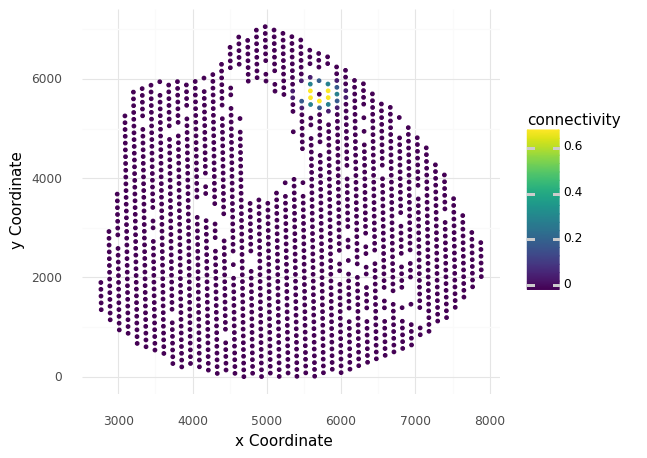

<ggplot: (8784954289306)>

In [9]:
li.pl.connectivity(adata, idx=1, spatial_key='spatial', connectivity_key='spatial_connectivities')

In [10]:
adata.uns['global_res'].sort_values('global_mean').tail(10)

interaction  ligand  ligand_means  ligand_props receptor  \
978    Calr^Itgav    Calr      2.058757      0.969986    Itgav   
364     App^Aplp2     App      1.412246      0.875171    Aplp2   
1168     Lpl^Lrp2     Lpl      1.402323      0.836289     Lrp2   
1153     Egf^Lrp2     Egf      1.847275      0.879263     Lrp2   
1178    Cubn^Lrp2    Cubn      1.150116      0.746930     Lrp2   
1156    Apoe^Lrp2    Apoe      1.523888      0.897681     Lrp2   
1170  Lrpap1^Lrp2  Lrpap1      1.522354      0.875853     Lrp2   
388      App^Rpsa     App      1.412246      0.875171     Rpsa   
1177   Hspa8^Lrp2   Hspa8      2.662398      0.993179     Lrp2   
1174    Tcn2^Lrp2    Tcn2      2.582618      0.991814     Lrp2   

      receptor_means  receptor_props  global_mean  global_sd  
978         0.899687        0.724420     0.786845   0.116811  
364         1.263897        0.836971     0.787357   0.135332  
1168        2.020214        0.918145     0.817075   0.127476  
1153        2.020214        0.918145     0.819543   0.093136  
1178        2.020214        0.918145     0.820953   0.154665  
1156        2.020214        0.918145     0.829199   0.093279  
1170        2.020214        0.918145     0.865996   0.112615  
388         2.691449        0.993179     0.893179   0.071759  
1177        2.020214        0.918145     0.911584   0.073792  
1174        2.020214        0.918145     0.924375   0.076758

In [11]:
# save results as modalities
local_lr = adata.obsm['local_scores']

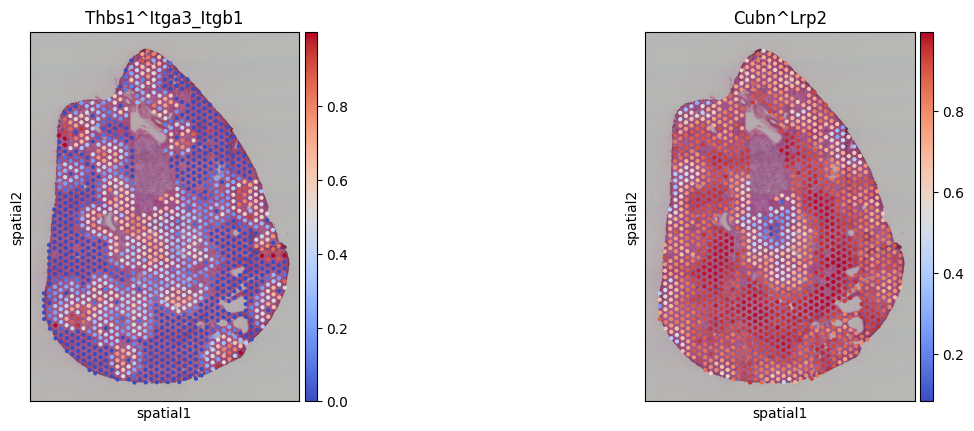

In [12]:
sc.pl.spatial(local_lr, color=['Thbs1^Itga3_Itgb1', 'Cubn^Lrp2'], cmap='coolwarm')

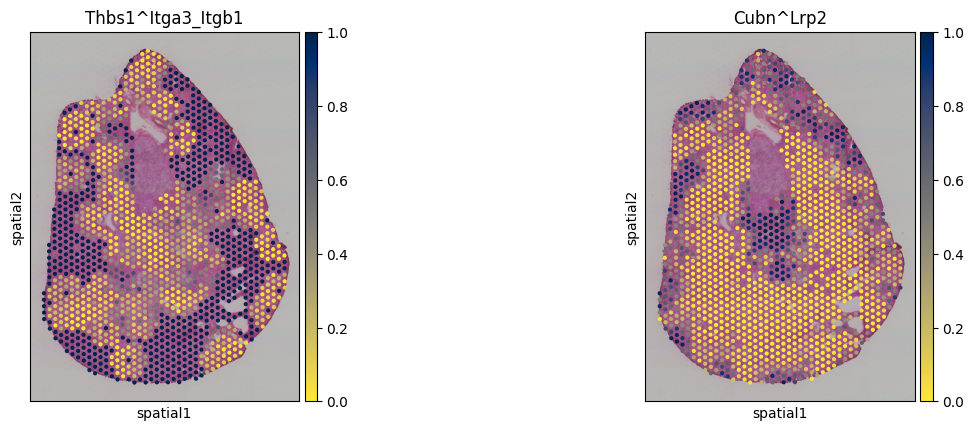

In [13]:
sc.pl.spatial(local_lr, color=['Thbs1^Itga3_Itgb1', 'Cubn^Lrp2'], cmap='cividis_r', layer='pvals')

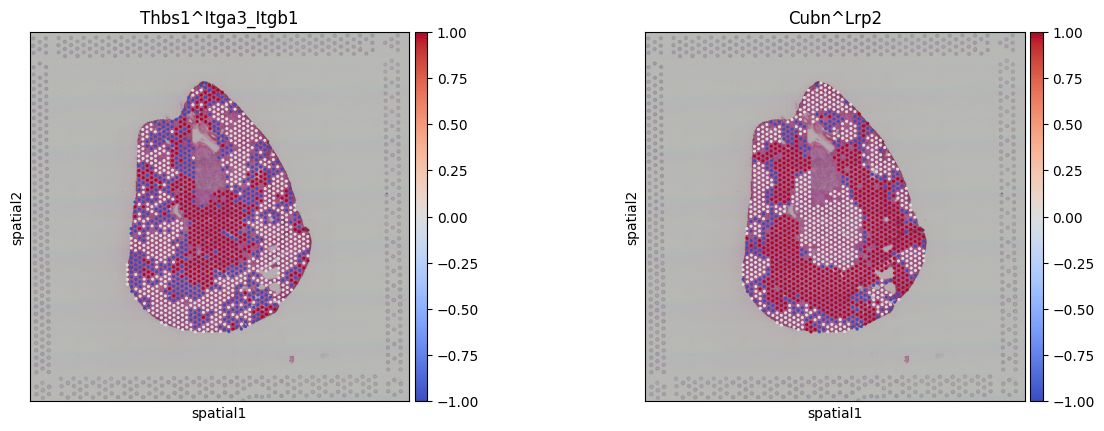

In [14]:
sq.pl.spatial_scatter(local_lr, color=['Thbs1^Itga3_Itgb1', 'Cubn^Lrp2'], cmap='coolwarm', layer='cats')

Load MOFAtalk loadings

In [15]:
lr_loadings = pd.read_csv(os.path.join('..', '..', 'data', 'kidney_injury', 'lr_loadings.csv'), index_col=0)

In [16]:
lrdata = mdatas['f12hr'].mod['lrs'].copy()

In [17]:
lr_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False).head(5)

view   Factor1   Factor2   Factor3   Factor4   Factor5
variable                                                                  
Slit2^Robo2      CNT&Fib -3.171660  0.223247  0.027718  0.257547  0.005480
Slit2^Robo2      DCT&Fib -3.145700  0.994464  0.028020  0.355244 -0.003128
Slit2^Robo1  DCT-CNT&Uro -3.137715 -1.707674  0.024842  0.132992 -0.020354
Slit2^Robo1      DCT&Uro -3.065370 -3.426198  0.053162 -0.154428 -0.400792
Slit2^Robo1      CNT&Uro -3.063561 -2.986251  0.126222 -0.021577 -0.002041

In [18]:
top_interactions = lr_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False).head(50)

In [19]:
top_interactions.head()

view   Factor1   Factor2   Factor3   Factor4   Factor5
variable                                                                  
Slit2^Robo2      CNT&Fib -3.171660  0.223247  0.027718  0.257547  0.005480
Slit2^Robo2      DCT&Fib -3.145700  0.994464  0.028020  0.355244 -0.003128
Slit2^Robo1  DCT-CNT&Uro -3.137715 -1.707674  0.024842  0.132992 -0.020354
Slit2^Robo1      DCT&Uro -3.065370 -3.426198  0.053162 -0.154428 -0.400792
Slit2^Robo1      CNT&Uro -3.063561 -2.986251  0.126222 -0.021577 -0.002041

In [20]:
top_interactions = np.unique(top_interactions.index)

In [21]:
top_interactions

array(['Adam12^Sdc4', 'Col18a1^Itgb5', 'Col4a3^Itga2_Itgb1',
       'Col4a3^Itga9_Itgb1', 'Gpc3^Igf1r', 'Hspg2^Lrp2', 'Lama2^Dag1',
       'Psap^Sort1', 'Sema5a^Met', 'Shank2^Cftr', 'Slit2^App',
       'Slit2^Robo1', 'Slit2^Robo2', 'Slit3^Robo1', 'Slit3^Robo2',
       'Spp1^Itga9_Itgb1', 'Spp1^Itgav_Itgb1', 'Spp1^Itgav_Itgb5',
       'Spp1^Itgav_Itgb6', 'Tnc^Itga2', 'Tnc^Itga9_Itgb1',
       'Tnc^Itgav_Itgb6', 'Tnc^Sdc4', 'Vegfa^Itga9', 'Vegfa^Itgb1'],
      dtype=object)

In [22]:
import re

In [23]:
interaction = 'Spp1^Itgav_Itgb1' # Up in Factor 1
# interaction = 'Slit2&Robo2' # Down in Factor 1

In [24]:
# split interaction with regex acc to & and _
genes = re.split('[_^]', interaction)

Plot on Slides

fsham


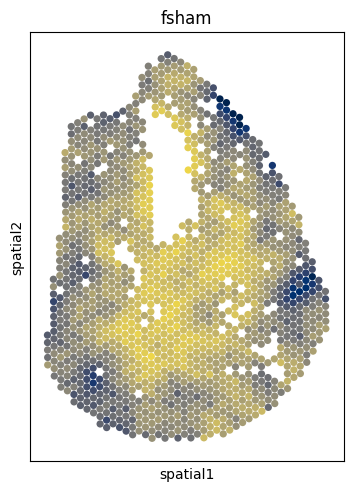

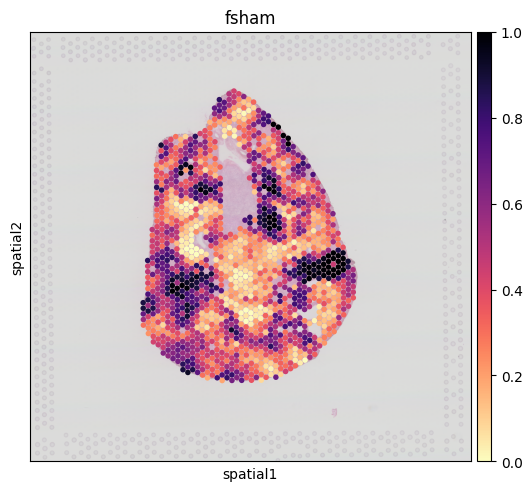

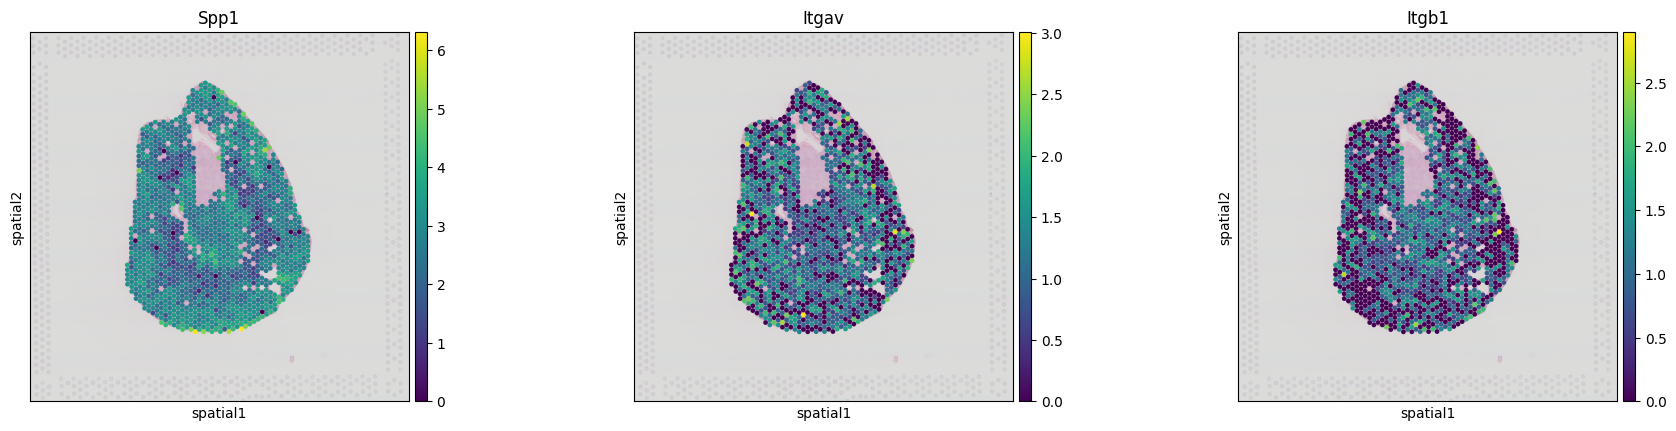

f4hr


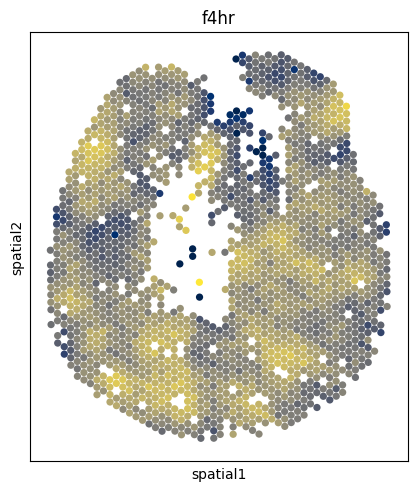

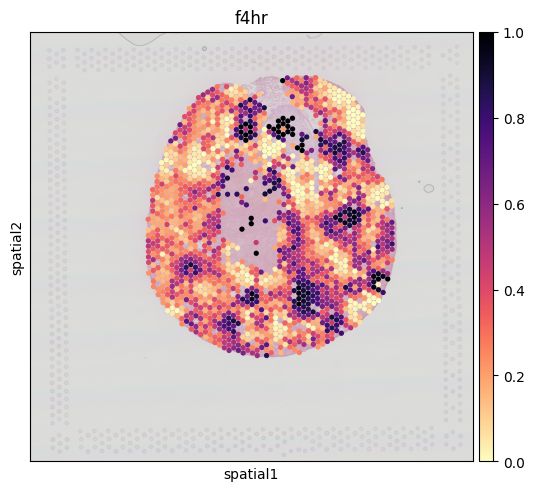

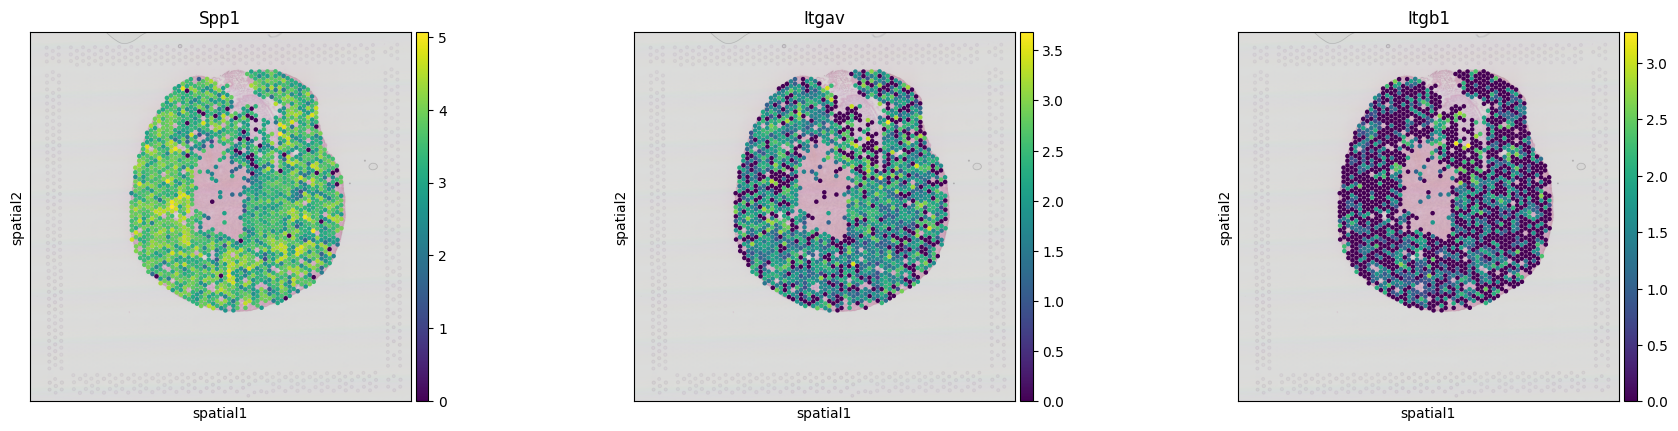

f12hr


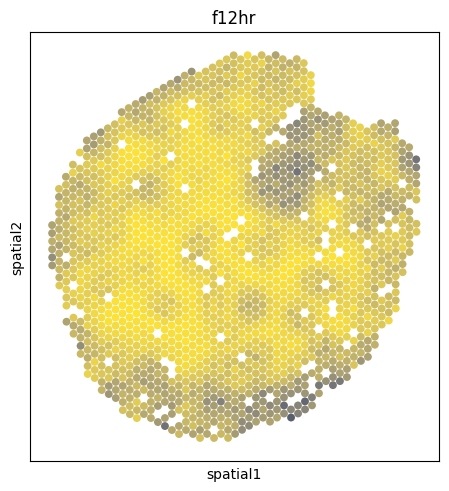

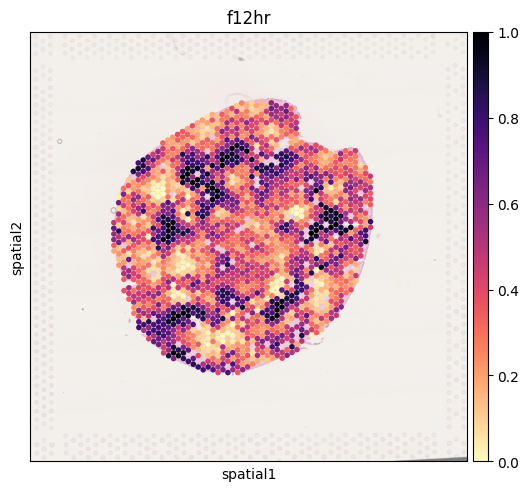

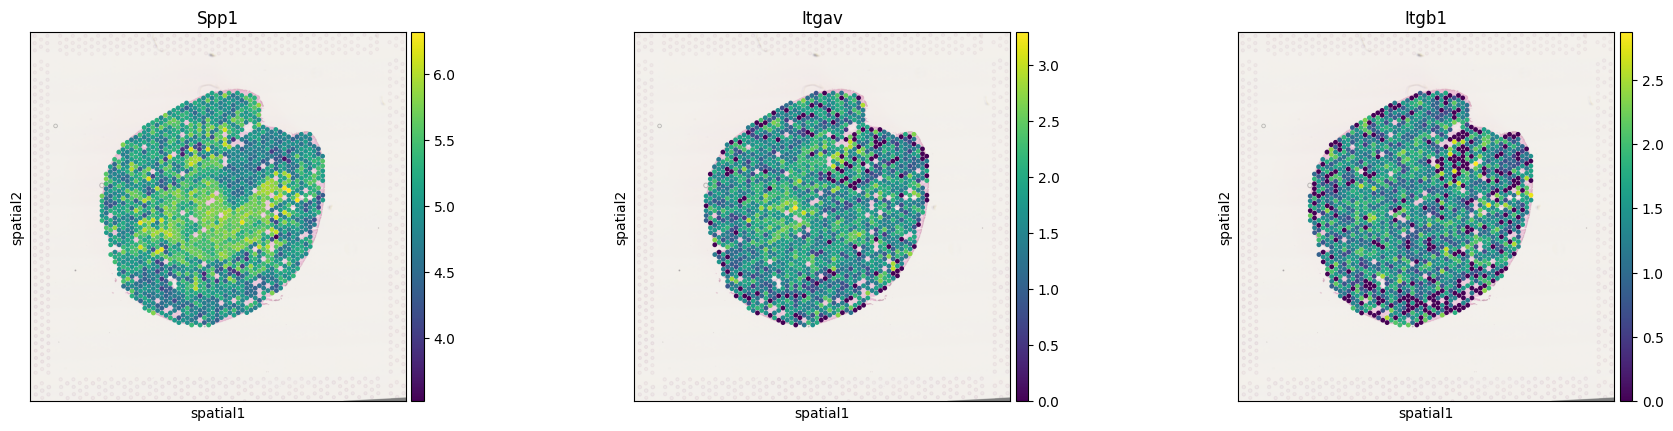

f2dps


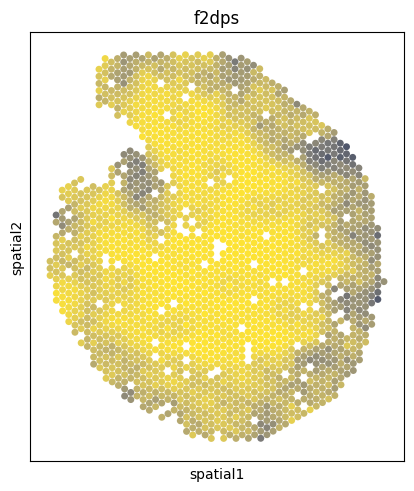

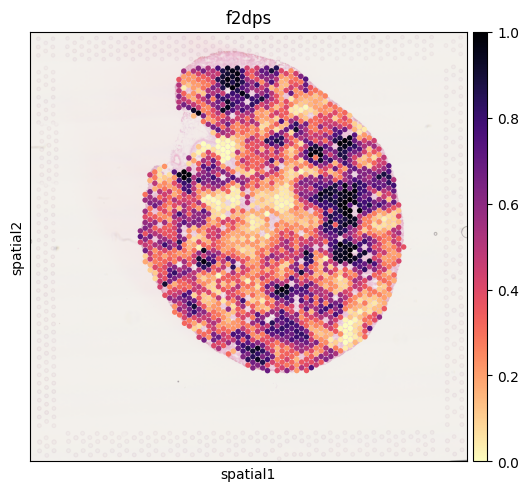

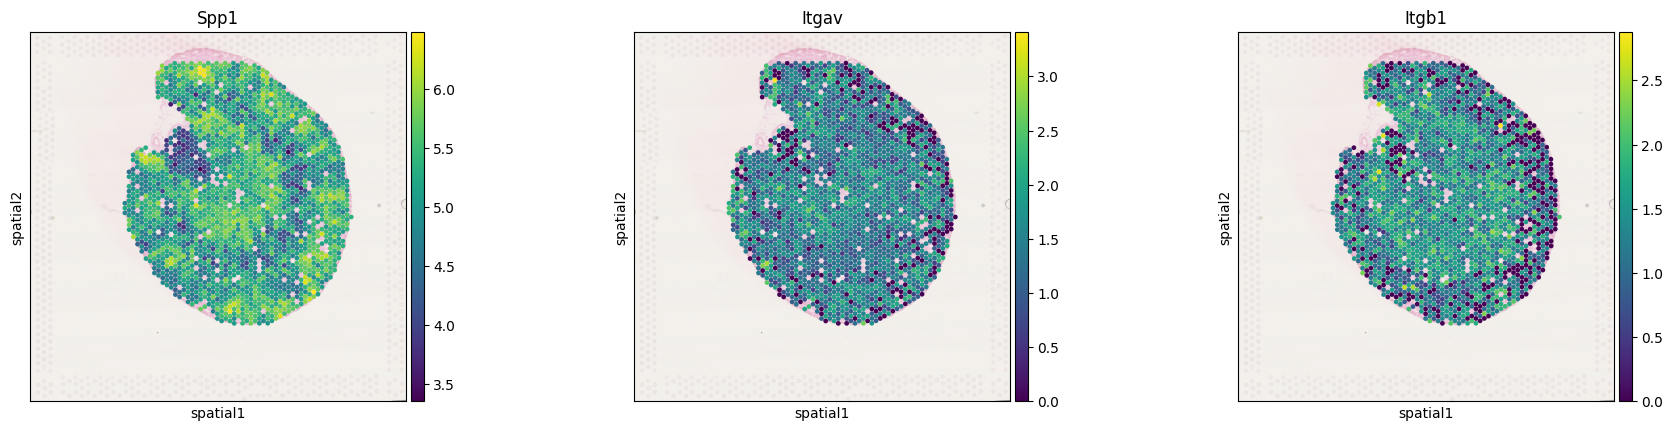

f6wks


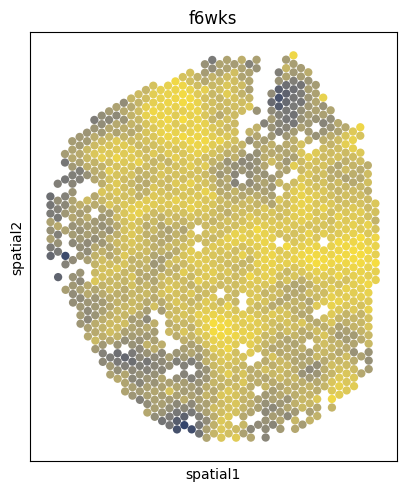

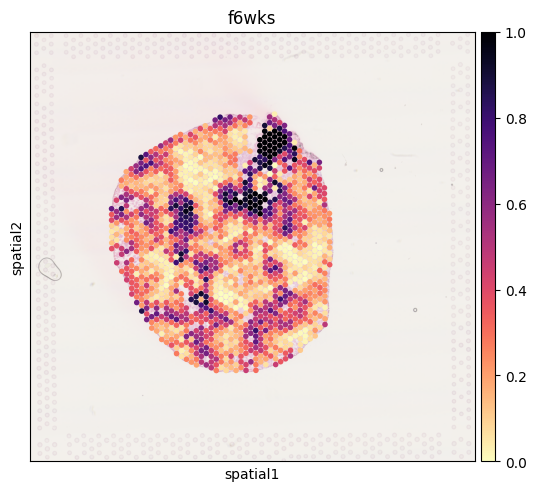

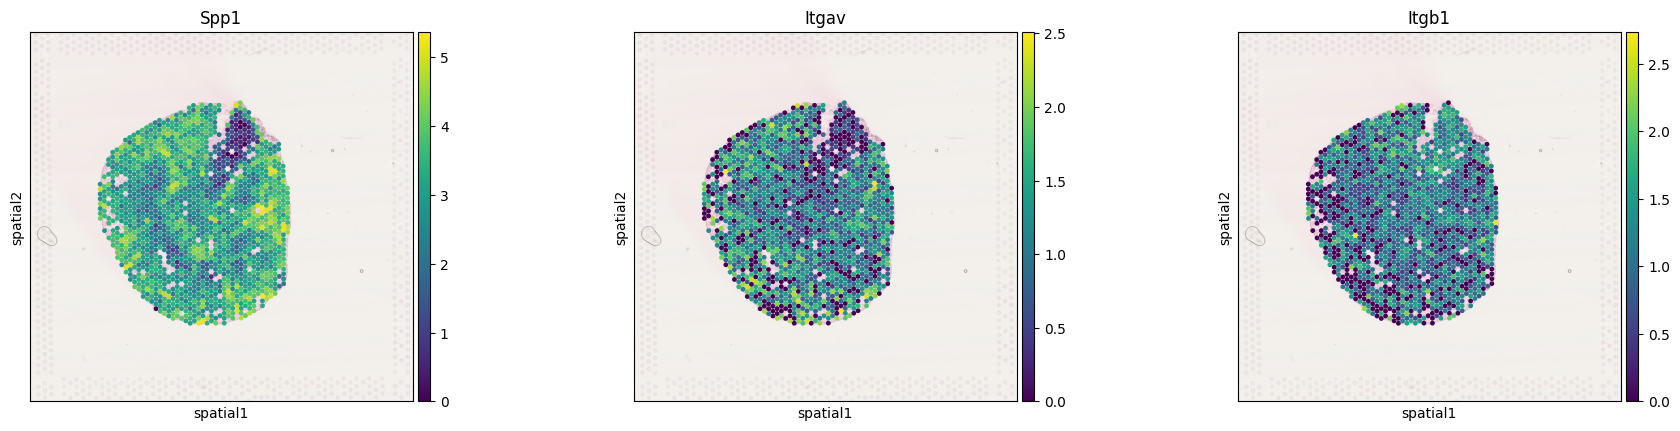

In [25]:
global_stat = pd.DataFrame(columns=['global_r', 'global_mean'])

for slide in times:
    print(slide)
        
    # interaction global score
    global_mean = mdatas[slide].mod['rna'].uns['global_res'].copy()
    # filter to interaction
    global_mean = global_mean.loc[global_mean['interaction']==interaction]
    
    # global_r
    global_r = mdatas[slide].mod['rna'].uns['morans_res'].copy()
    # filter to interaction
    global_r = global_r.loc[global_r['interaction']==interaction]
    
    global_stat.loc[slide, 'global_r'] = global_r['global_r'].values[0]
    global_stat.loc[slide, 'global_mean'] = global_mean['global_mean'].values[0]
   
        
    if interaction in mdatas[slide].mod['lrs'].var.index:
        sq.pl.spatial_scatter(mdatas[slide].mod['lrs'], color=[interaction], ncols=2, cmap='cividis',
                              title=slide, img_alpha=0.5, 
                              legend_fontsize='xx-large',
                              vmax=1, vmin=0, size=1.5,
                              legend_na=False, colorbar=False, img=False)
        # reverse cmap
        sq.pl.spatial_scatter(mdatas[slide].mod['lrs'], color=[interaction], ncols=2, title=slide,
                              cmap='magma_r', img_alpha=0.5, legend_fontsize='xx-large',
                              vmax=1, vmin=0, size=1.5, layer='pvals')
        
        sq.pl.spatial_scatter(mdatas[slide].mod['rna'], color=genes, cmap='viridis', img_alpha=0.5, legend_fontsize='xx-large', size=1.5)
    
    plt.show()

In [26]:
global_stat = global_stat.reset_index(names="Group")

In [27]:
# pivot to long
global_stat = global_stat.melt(id_vars='Group', var_name='stat', value_name='value')

In [28]:
# Rename groups, fsham to Cotrnol, f4hr to 4 hours, f12hr to 12 hours, etc
global_stat = global_stat.replace({'Group': {'fsham': 'Control',
                                             'f4hr': '4 hours',
                                             'f12hr': '12 hours',
                                             'f2dps': '2 days',
                                             'f6wks': '6 weeks'}
                                   })

In [29]:
df = global_stat

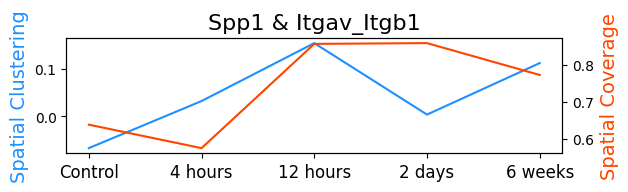

In [30]:
# Create figure and axes
fig, ax1 = plt.subplots()

# Create a second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis
ax1.plot(df[df['stat'] == 'global_r']['Group'], df[df['stat'] == 'global_r']['value'], color='dodgerblue')
# ax1.set_xlabel('Group')
ax1.set_ylabel('Spatial Clustering', color='dodgerblue', size=14)

# Plot data on the second y-axis
ax2.plot(df[df['stat'] == 'global_mean']['Group'], df[df['stat'] == 'global_mean']['value'], color='orangered')
ax2.set_ylabel('Spatial Coverage', color='orangered', size=14)

# increase x axis size
ax1.tick_params(axis='x', labelsize=12)
# increase x axis title size
ax1.xaxis.label.set_size(14)

# Set title
plt.title('Spp1 & Itgav_Itgb1', size=16)

# change x to y figure size ratio
fig.set_figheight(1.5)

plt.show()